#  Violent crime cases are more likely to solved that non-violent crime, and the rate of violent crime decreases in proportion to the distance from the oceanic coast.

Here I investigated the San Francisco crime data set to investigate where violent crimes are most likely to occur and if they are more likely to be solved than non-violent cases. In doing so I developed some heuristics to determine if a crime was labeled as violent.

First we import appriprate modules, load the data and add extra features.

In [40]:
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (10, 6)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
infile = "sanfrancisco_incidents_summer_2014.csv"
crime_data = pd.read_csv(infile)
violent_cimes_list = ['ASSAULT', 'HOMICIDE', 'KNIFE', 'WEAPON', 'BATTERY', 'INJURY', 'FORCE', 'GUN', 'VIOLENCE', 'ARSON']

Here violent_crimes_list is used to detect if a crime was violent; we scan through the desciptions of each case and if it was contains any of these words, it is deemed to be a violent crime. This list was created by analysing the unique fields manually.

Now we create new fields using this data, and also by determining which cases are solved. The X and Y fields of the data give the lattitude and longtitude respectively of the crime. The locations are grouped into buckets by rouning these values to two decimal places.

In [41]:
def is_violent(s):
    for i in violent_cimes_list:
        if i in s:
            return 1
    return 0

# now add the indicator if criminal(s) found
crime_data['solved_case'] = crime_data['Resolution'].map(lambda x: 0 if x == "NONE" else 1)
crime_data['crime_commited'] = 1
crime_data['X'] = -crime_data['X']
crime_data['approx_x'] = np.round(crime_data.X, 2)
crime_data['approx_y'] = np.round(crime_data.Y, 2)
crime_data['violent_crime'] = crime_data['Descript'].map(is_violent)

Now we group the data by these new positionsal buckets.

In [42]:
# group by lattitude first
crime_grouped_lattitude = crime_data.groupby('approx_x') # crime grouped by approx lattitude
proportion_solved_case_by_lat = crime_grouped_lattitude.solved_case.mean() #average solved crime mean per lattitude (not used)
total_crime_by_lat = crime_grouped_lattitude.crime_commited.count() # total crime by lattitude
solved_crime_by_lat = crime_grouped_lattitude.solved_case.sum() #solved crime by lattitude

# now by longtitude
crime_grouped_longtitude = crime_data.groupby('approx_y')
proportion_solved_case_by_lon = crime_grouped_longtitude.solved_case.mean()
total_crime_by_lon = crime_grouped_longtitude.crime_commited.count()
solved_crime_by_lon = crime_grouped_longtitude.solved_case.sum()

As raw Now we can calulate the total figured here would not make much sense (as we do not have the population density), let's calculate the proportion of crimes unsolved and the proportion of crimes that are violent, grouped bt lattitude and longtitude bukets.

In [43]:
rate_of_unssolved_crime_by_lat =  1 - solved_crime_by_lat / total_crime_by_lat
rate_of_unssolved_crime_by_lon =  1 - solved_crime_by_lon / total_crime_by_lon

violent_crime_by_lat = crime_grouped_lattitude.violent_crime.sum()
violent_crime_prop_by_lat = violent_crime_by_lat / total_crime_by_lat

violent_crime_by_lon = crime_grouped_longtitude.violent_crime.sum()
violent_crime_prop_by_lon = violent_crime_by_lon / total_crime_by_lon

Now we can plot the propotion of unsolved cases and violent cases as distnaces from the North and West coast:

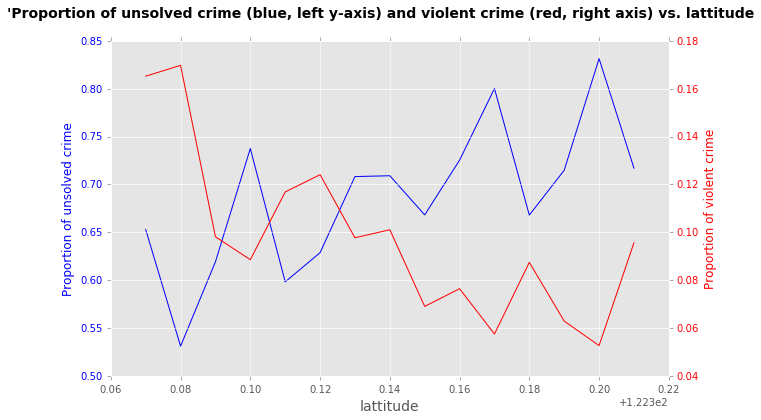

In [44]:
#plt.plot(rate_of_unssolved_crime_by_lat)
fig, ax1 = plt.subplots()
fig.suptitle("'Proportion of unsolved crime (blue, left y-axis) and violent crime (red, right axis) vs. lattitude", 
            fontsize=14, fontweight='bold')
ax1.set_xlabel('lattitude', fontsize=14)
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Proportion of unsolved crime', color='b')
ax1.plot(rate_of_unssolved_crime_by_lat, 'b-')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
ax2.plot(violent_crime_prop_by_lat, 'r')
ax2.set_ylabel('Proportion of violent crime', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.show()

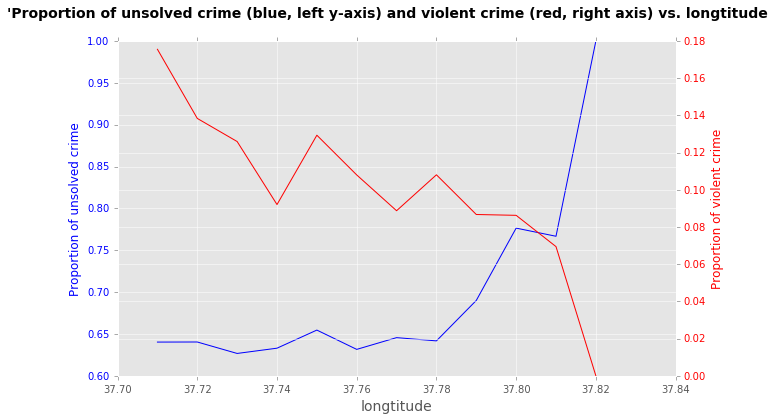

In [48]:
fig, ax1 = plt.subplots()
fig.suptitle("'Proportion of unsolved crime (blue, left y-axis) and violent crime (red, right axis) vs. longtitude", 
            fontsize=14, fontweight='bold')
ax1.set_xlabel('longtitude', fontsize=14)
ax1.set_ylabel('Proportion of unsolved crime', color='b')
ax1.plot(rate_of_unssolved_crime_by_lon, 'b-')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
ax2.plot(violent_crime_prop_by_lon, 'r')
ax2.set_ylabel('Proportion of violent crime', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.show()

So above we see that as distance from the oceanic coast increases, the rate of unsolved crime increases while the rate of violent crime decreases. This effect is most evident on the longtitude. We can also see that the total absolute number of crimes is lowest near the coastlines:

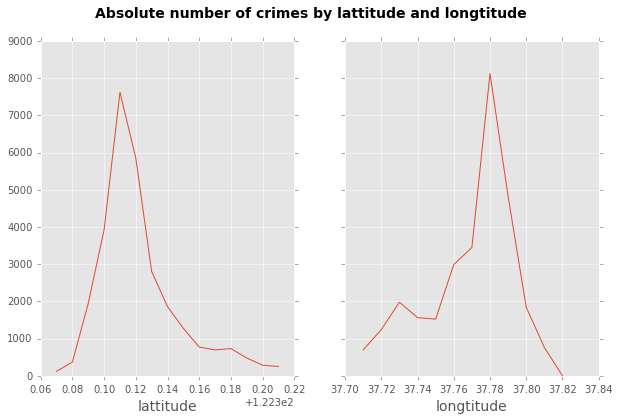

In [46]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(total_crime_by_lat)
ax1.set_xlabel('lattitude', fontsize=14)
f.suptitle('Absolute number of crimes by lattitude and longtitude', fontsize=14, fontweight='bold')
ax2.plot(total_crime_by_lon)
ax2.set_xlabel('longtitude', fontsize=14)
plt.show()

Now we should check if violent crimes are more likely to result in a prosecition or be solved. We calulate the total number of violent and non-violent crimes and the number of which were solved. We then plot these are a bar graph.

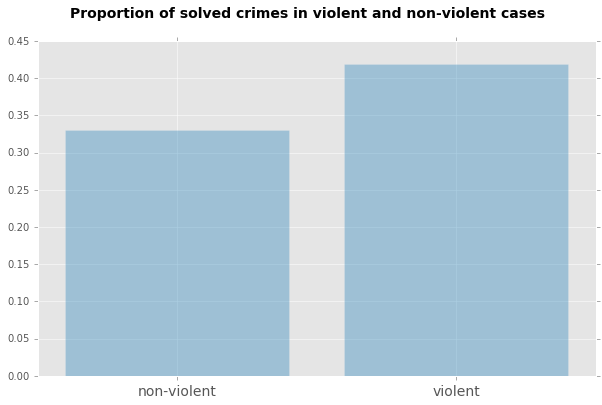

In [47]:
crime_grouped_violent = crime_data.groupby('violent_crime')
total_by_violent = crime_grouped_violent.crime_commited.sum()
total_solved_by_violent = crime_grouped_violent.solved_case.sum()
proportion_solved_by_violent = total_solved_by_violent / total_by_violent

plt.bar([1, 2], proportion_solved_by_violent, align='center', alpha=0.4)
plt.suptitle("Proportion of solved crimes in violent and non-violent cases", fontsize=14, fontweight='bold')
plt.xticks([1, 2], ['non-violent', 'violent'], fontsize=14)
plt.show()

#Conclusion: The total number of crimes is lower near the coast. Of these crimes, more crimes are not likely to be solved if they are away from the coast. As you move further from the coastline, the rate of violent crime decreases substantially. In general, violent crimes are slightly more likely to be solved.

#The higher number of unsolved crimes near the coast may mean that many of these crimes are not serious, so authorities are using their resources on the more severe (violent) crimes near the center of the city. In any case, it certainly appears far safer to live near the East or North coast of San Francisco rather than the middle or South.